In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\jhonn\Downloads\datasets\twitter_training.csv",header=None)
df

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [3]:
df.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
df.tail()

,0,1,2,3
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [5]:
df.shape

(74682, 4)

In [6]:
df.dtypes

0     int64
1    object
2    object
3    object
dtype: object

In [7]:
df.isna().sum()

0      0
1      0
2      0
3    686
dtype: int64

In [8]:
df=df.dropna()
df.shape

(73996, 4)

In [9]:
df.duplicated().sum()


2340

In [10]:
df.drop_duplicates(inplace=True)
df.shape

(71656, 4)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71656 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       71656 non-null  int64 
 1   1       71656 non-null  object
 2   2       71656 non-null  object
 3   3       71656 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


In [12]:
df.columns = ['ID', 'Game', 'Sentiment', 'Text']
df.head()

,ID,Game,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [13]:
df['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

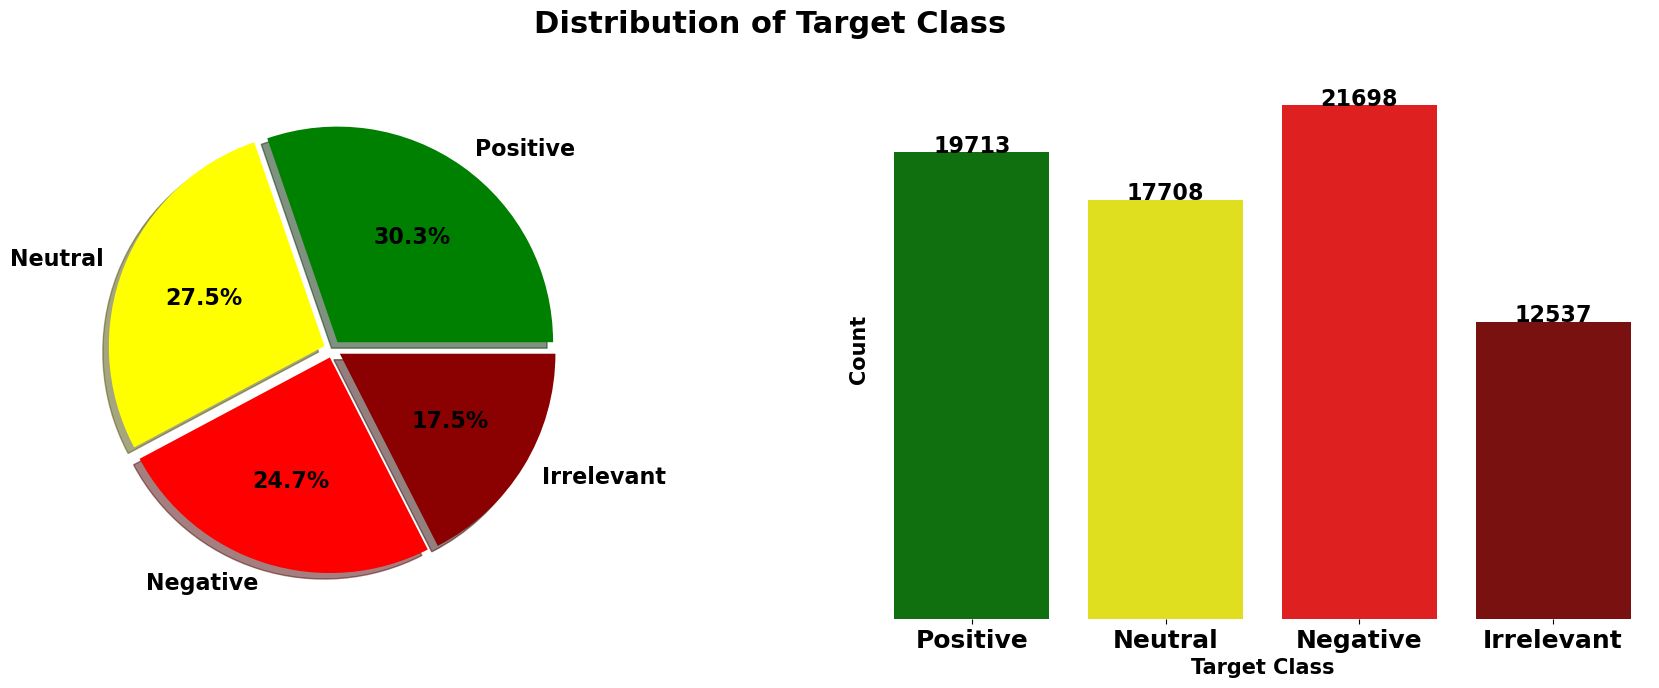

In [14]:
plt.figure(figsize=(22, 7))
plt.suptitle('Distribution of Target Class',weight='bold',fontsize=22)
label_count = df['Sentiment'].value_counts().values
label = df['Sentiment'].value_counts().index

plt.subplot(1, 2, 1)
explode = (0.04, 0.04,0.04,0.04)
colors = ['green', 'yellow','red','darkred']
labels = ['Positive','Neutral','Negative','Irrelevant']
plt.pie(x=label_count, labels=labels, autopct='%1.1f%%', shadow=True, radius=1, colors=colors, explode=explode,textprops={'fontsize': 16, 'weight': 'bold'})


plt.subplot(1, 2, 2)
colors = ['green', 'yellow','red','darkred']
ax = sns.countplot(x=df['Sentiment'], palette=colors)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),fontsize=16,weight='bold',ha='center')
plt.xticks([0, 1,2,3], ['Positive','Neutral','Negative','Irrelevant'], fontsize=18, weight='bold')
plt.yticks([])
plt.ylabel('Count',fontsize=15,weight='bold')
plt.xlabel('Target Class',fontsize=15,weight='bold')


sns.despine(left=True, bottom=True)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.subplots_adjust(wspace=0.2)
plt.show()

In [15]:
df.columns

Index(['ID', 'Game', 'Sentiment', 'Text'], dtype='object')

In [16]:
df = df.drop(['ID'], axis=1)
df.head()

,Game,Sentiment,Text
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [17]:
df['Game'].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

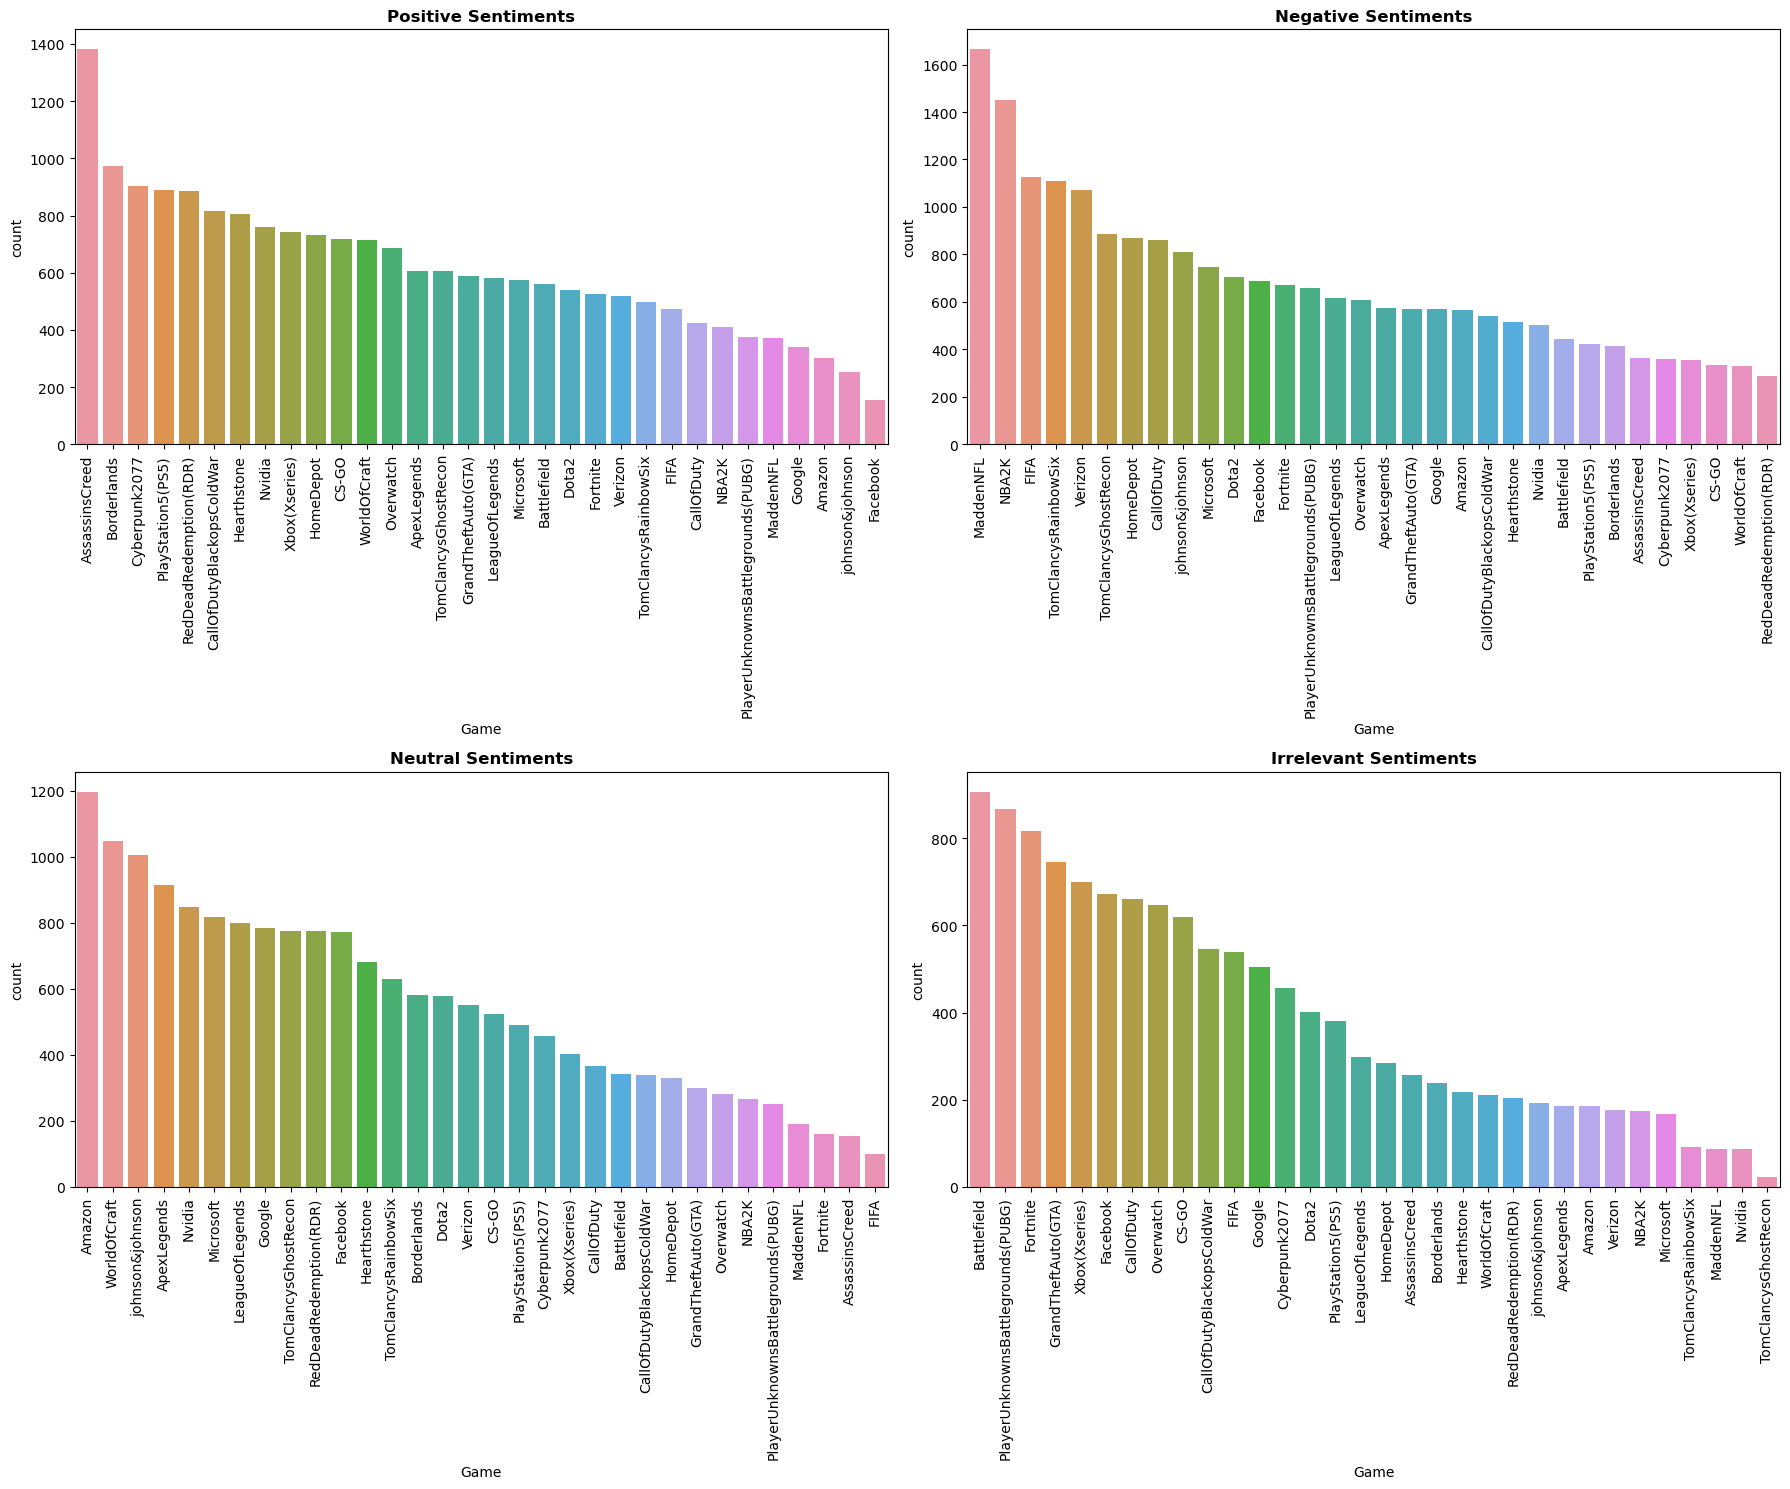

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 15))
sentiments = ['Positive', 'Negative', 'Neutral', 'Irrelevant']

for i, sentiment in enumerate(sentiments, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x='Game', data=df[df['Sentiment'] == sentiment],
                  order=df[df['Sentiment'] == sentiment]['Game'].value_counts().index)
    plt.title(f'{sentiment} Sentiments',weight='bold')  # Proper indentation
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


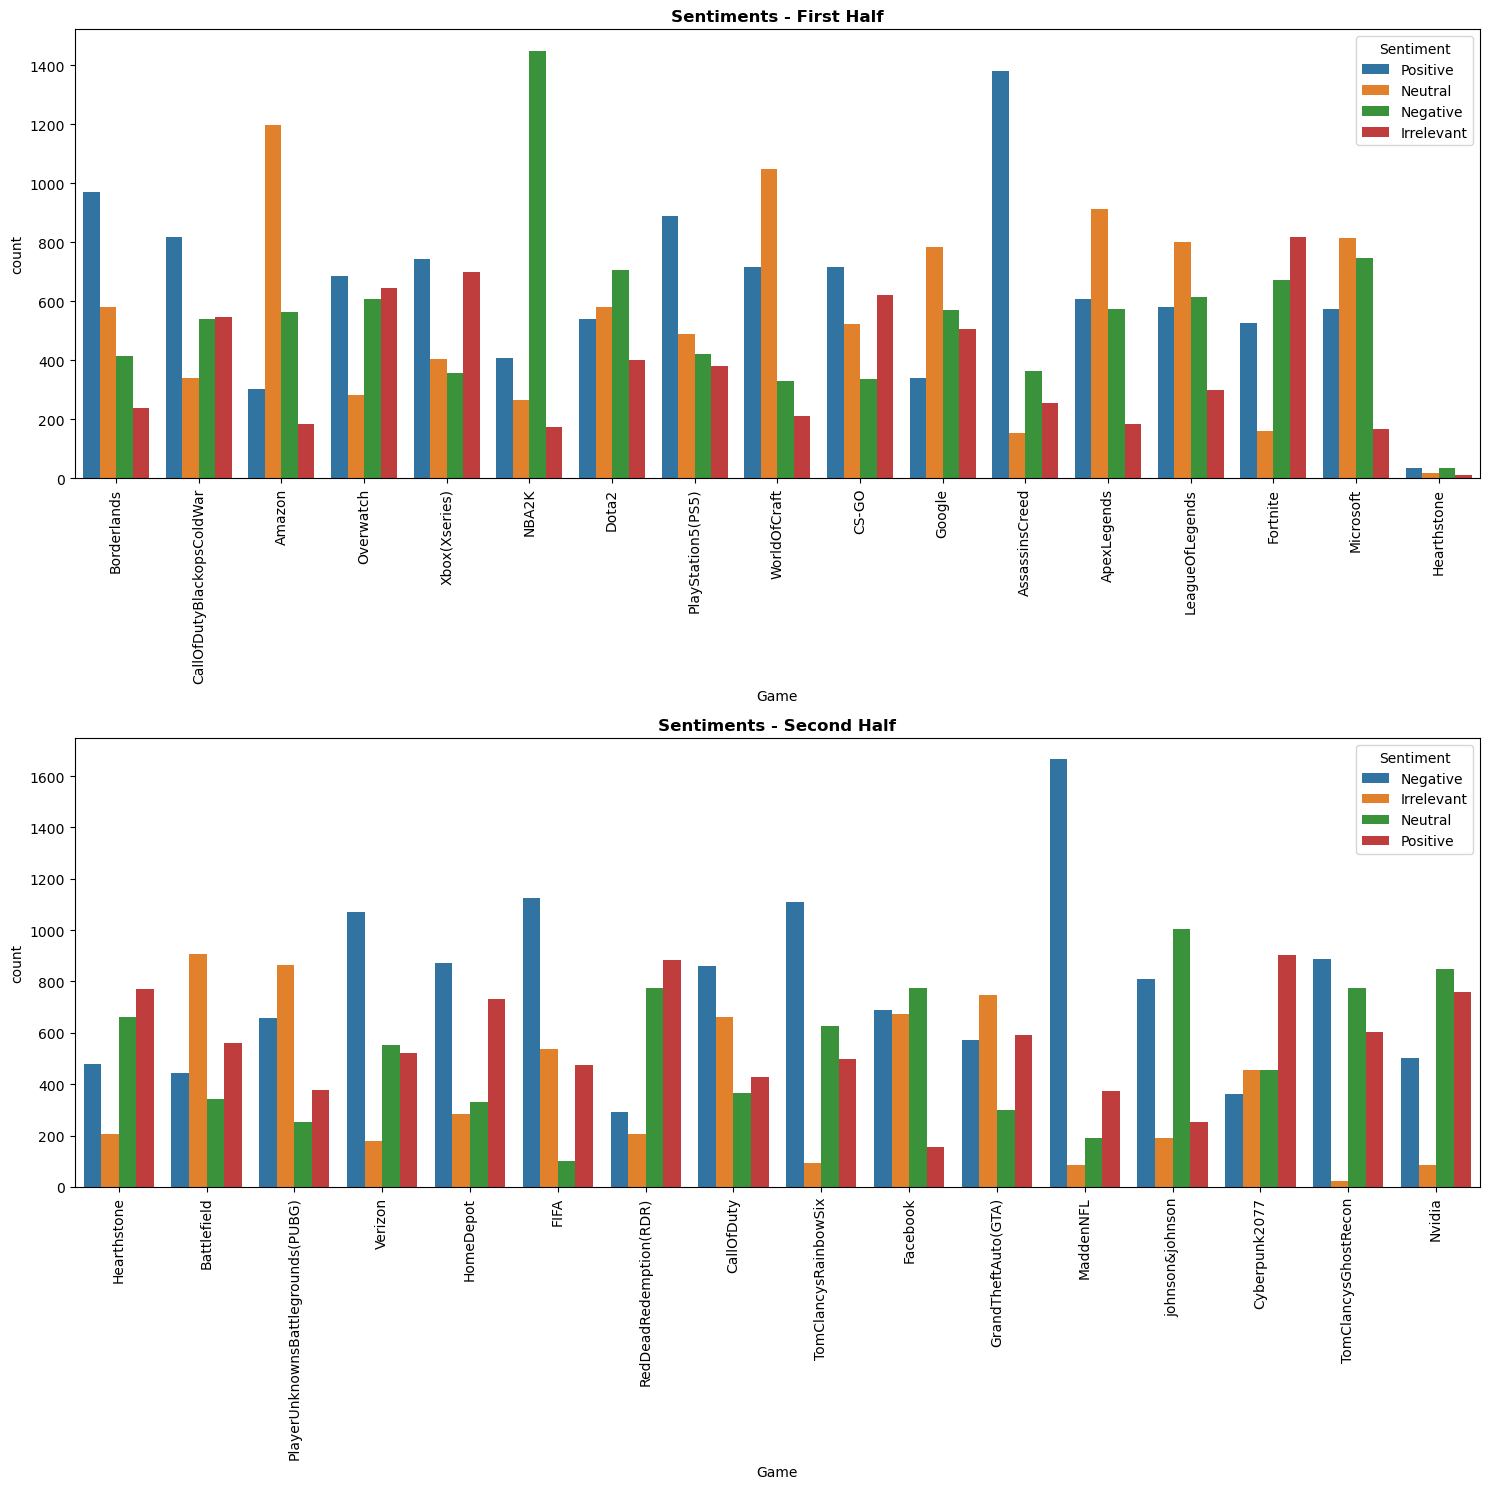

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 15))
midpoint = len(df) // 2

plt.subplot(2, 1, 1)  # Two rows, one column, first plot
sns.countplot(x='Game', hue='Sentiment', data=df.iloc[:midpoint])
plt.title('Sentiments - First Half',weight='bold')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)  # Two rows, one column, second plot
sns.countplot(x='Game', hue='Sentiment', data=df.iloc[midpoint:])
plt.title('Sentiments - Second Half',weight='bold')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


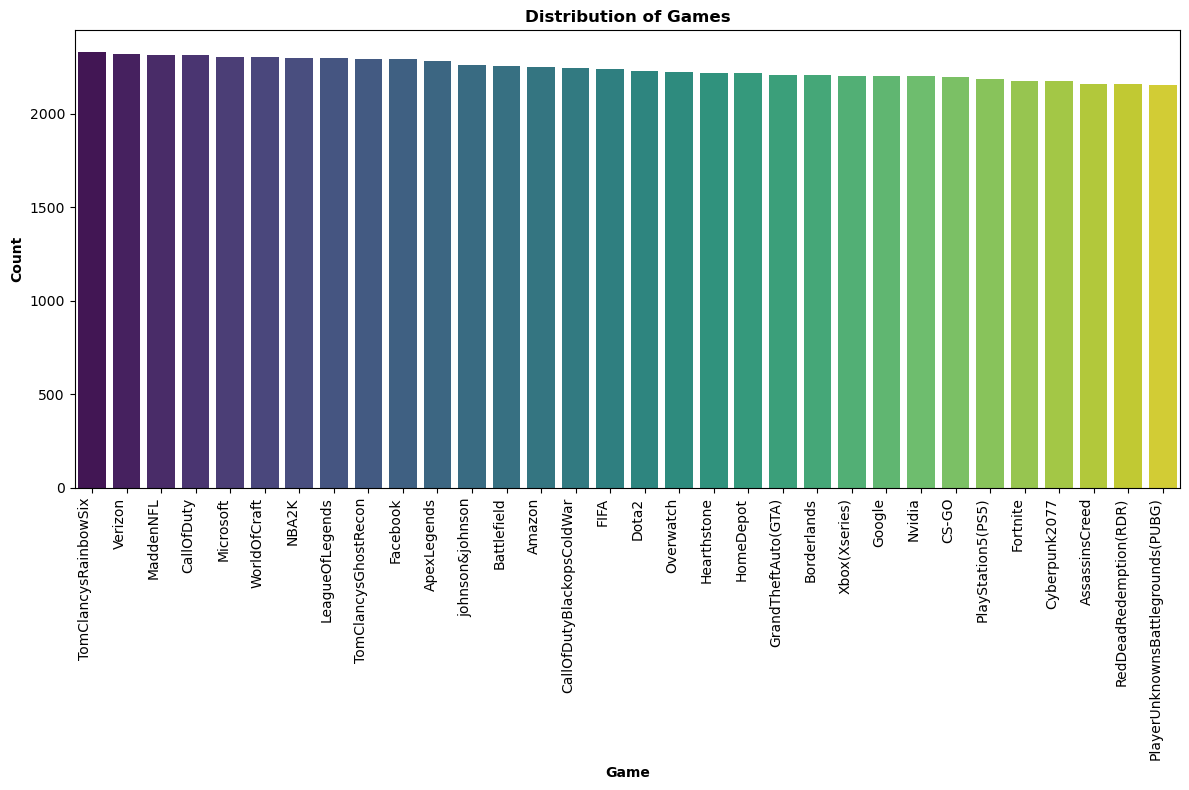

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.countplot(x='Game', data=df, order=df['Game'].value_counts().index, palette='viridis')

plt.title('Distribution of Games',weight='bold')
plt.xlabel('Game',weight='bold')
plt.ylabel('Count',weight='bold')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

In [21]:
df.columns

Index(['Game', 'Sentiment', 'Text'], dtype='object')

In [22]:
df.head()

,Game,Sentiment,Text
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [23]:
df['num_of_characters']=df['Text'].apply(len)
df

,Game,Sentiment,Text,num_of_characters
0,Borderlands,Positive,im getting on borderlands and i will murder yo...,53
1,Borderlands,Positive,I am coming to the borders and I will kill you...,51
2,Borderlands,Positive,im getting on borderlands and i will kill you ...,50
3,Borderlands,Positive,im coming on borderlands and i will murder you...,51
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57
...,...,...,...,...
74677,Nvidia,Positive,Just realized that the Windows partition of my...,128
74678,Nvidia,Positive,Just realized that my Mac window partition is ...,117
74679,Nvidia,Positive,Just realized the windows partition of my Mac ...,125
74680,Nvidia,Positive,Just realized between the windows partition of...,159


In [24]:
df['no_of_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Game,Sentiment,Text,num_of_characters,no_of_words
0,Borderlands,Positive,im getting on borderlands and i will murder yo...,53,11
1,Borderlands,Positive,I am coming to the borders and I will kill you...,51,13
2,Borderlands,Positive,im getting on borderlands and i will kill you ...,50,11
3,Borderlands,Positive,im coming on borderlands and i will murder you...,51,11
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57,13


In [25]:
df['no_of_sentence']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Game,Sentiment,Text,num_of_characters,no_of_words,no_of_sentence
0,Borderlands,Positive,im getting on borderlands and i will murder yo...,53,11,1
1,Borderlands,Positive,I am coming to the borders and I will kill you...,51,13,1
2,Borderlands,Positive,im getting on borderlands and i will kill you ...,50,11,1
3,Borderlands,Positive,im coming on borderlands and i will murder you...,51,11,1
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57,13,1


In [26]:
df.describe()

,num_of_characters,no_of_words,no_of_sentence
count,71656.000000,71656.000000,71656.000000
mean,110.538127,22.959375,1.864519
std,79.409848,17.152354,1.418169
min,1.000000,0.000000,0.000000
25%,49.000000,10.000000,1.000000
50%,93.000000,19.000000,1.000000
75%,155.000000,32.000000,2.000000
max,957.000000,198.000000,25.000000


In [27]:
df[df['Sentiment']=='Positive'].describe()

,num_of_characters,no_of_words,no_of_sentence
count,19713.000000,19713.000000,19713.000000
mean,98.289859,20.775478,1.832395
std,77.426941,16.807169,1.404607
min,1.000000,0.000000,0.000000
25%,39.000000,8.000000,1.000000
50%,77.000000,16.000000,1.000000
75%,137.000000,29.000000,2.000000
max,692.000000,198.000000,21.000000


In [28]:
df[df['Sentiment']=='Negative'].describe()

,num_of_characters,no_of_words,no_of_sentence
count,21698.000000,21698.000000,21698.000000
mean,113.421790,23.736151,1.790165
std,81.742781,17.381277,1.289315
min,1.000000,0.000000,0.000000
25%,48.000000,10.000000,1.000000
50%,94.000000,19.000000,1.000000
75%,163.000000,34.000000,2.000000
max,727.000000,198.000000,21.000000


In [29]:
df[df['Sentiment']=='Neutral'].describe()

,num_of_characters,no_of_words,no_of_sentence
count,17708.000000,17708.000000,17708.000000
mean,119.551841,24.169358,1.958098
std,77.279396,17.030867,1.547919
min,1.000000,0.000000,0.000000
25%,63.000000,12.000000,1.000000
50%,106.000000,20.000000,1.000000
75%,162.000000,33.000000,2.000000
max,957.000000,198.000000,25.000000


In [30]:
df[df['Sentiment']=='Irrelevant'].describe()

,num_of_characters,no_of_words,no_of_sentence
count,12537.000000,12537.000000,12537.000000
mean,112.074819,23.339874,1.911542
std,79.055895,17.150282,1.451319
min,1.000000,0.000000,0.000000
25%,51.000000,11.000000,1.000000
50%,93.000000,19.000000,1.000000
75%,156.000000,32.000000,2.000000
max,692.000000,198.000000,25.000000


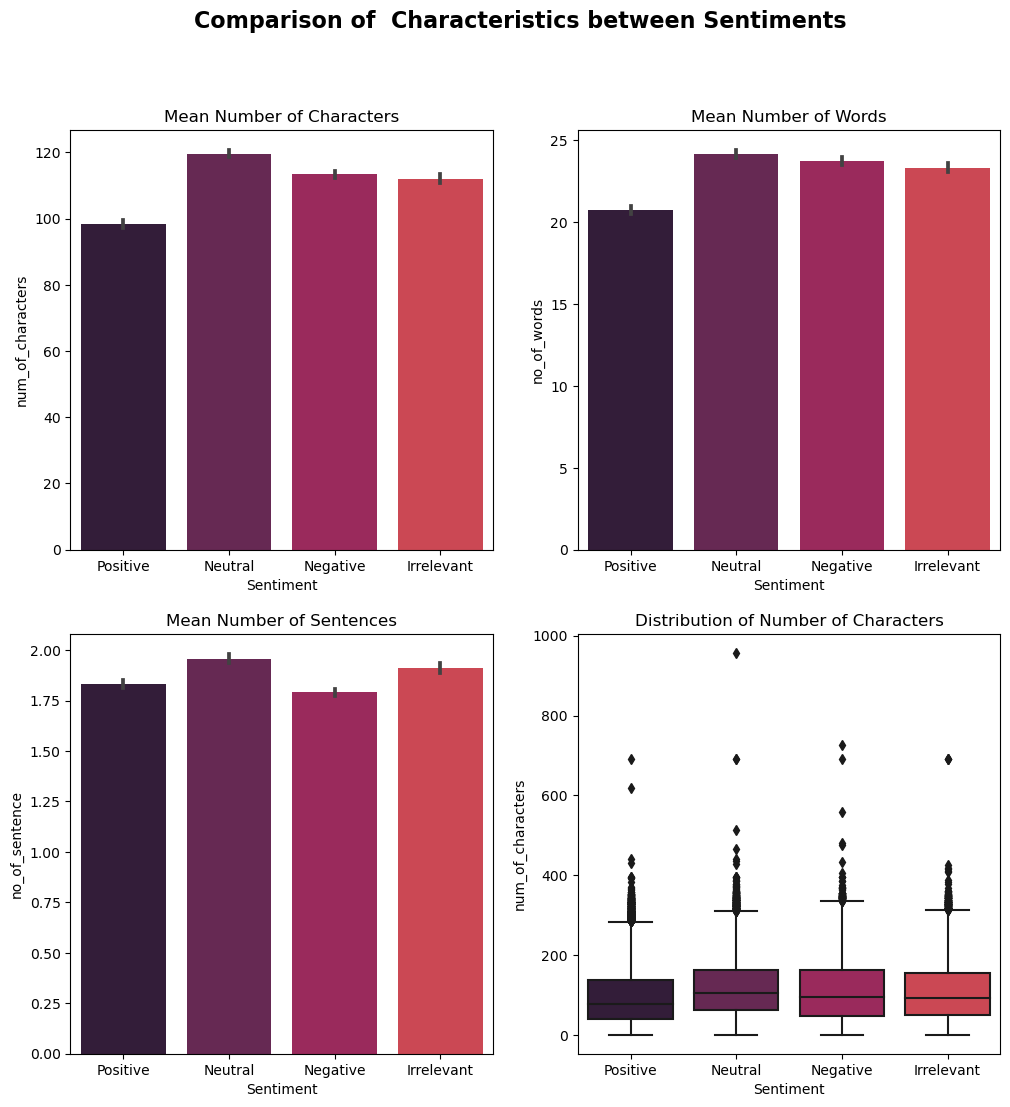

In [31]:
sns.set_palette("rocket")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

sns.barplot(x='Sentiment', y='num_of_characters', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Mean Number of Characters')

sns.barplot(x='Sentiment', y='no_of_words', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Mean Number of Words')

sns.barplot(x='Sentiment', y='no_of_sentence', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Mean Number of Sentences')

sns.boxplot(x='Sentiment', y='num_of_characters', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Number of Characters')

fig.suptitle('Comparison of  Characteristics between Sentiments', fontsize=16,weight='bold')
for ax in axes.flatten():
    ax.grid(False)

plt.subplots_adjust(wspace=0.2)
plt.show()

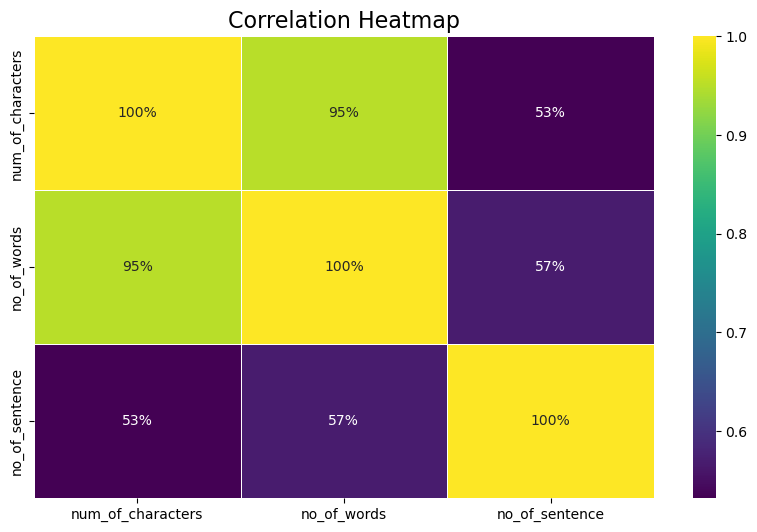

In [32]:
sns.set_palette("viridis")
corr_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=.5,fmt=".0%")

plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [33]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string

ps = PorterStemmer()
# nltk.download('stopwords')

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    
    for i in text:
        if i.isalnum() and i not in stopwords.words('english'):
            y.append(ps.stem(i))
    
    return " ".join(y)

In [34]:
df['Text']=df['Text'].apply(transform_text)
df

,Game,Sentiment,Text,num_of_characters,no_of_words,no_of_sentence
0,Borderlands,Positive,im get borderland murder,53,11,1
1,Borderlands,Positive,come border kill,51,13,1
2,Borderlands,Positive,im get borderland kill,50,11,1
3,Borderlands,Positive,im come borderland murder,51,11,1
4,Borderlands,Positive,im get borderland 2 murder,57,13,1
...,...,...,...,...,...,...
74677,Nvidia,Positive,realiz window partit mac like 6 year behind nv...,128,26,1
74678,Nvidia,Positive,realiz mac window partit 6 year behind nvidia ...,117,24,1
74679,Nvidia,Positive,realiz window partit mac 6 year behind nvidia ...,125,27,1
74680,Nvidia,Positive,realiz window partit mac like 6 year behind nv...,159,32,1


In [35]:
message=df.Text
message

0                                 im get borderland murder
1                                         come border kill
2                                   im get borderland kill
3                                im come borderland murder
4                               im get borderland 2 murder
                               ...                        
74677    realiz window partit mac like 6 year behind nv...
74678    realiz mac window partit 6 year behind nvidia ...
74679    realiz window partit mac 6 year behind nvidia ...
74680    realiz window partit mac like 6 year behind nv...
74681    like window partit mac like 6 year behind driv...
Name: Text, Length: 71656, dtype: object

In [36]:
message=message.str.replace('[^a-zA-Z0-9]+',' ')
message

0                                 im get borderland murder
1                                         come border kill
2                                   im get borderland kill
3                                im come borderland murder
4                               im get borderland 2 murder
                               ...                        
74677    realiz window partit mac like 6 year behind nv...
74678    realiz mac window partit 6 year behind nvidia ...
74679    realiz window partit mac 6 year behind nvidia ...
74680    realiz window partit mac like 6 year behind nv...
74681    like window partit mac like 6 year behind driv...
Name: Text, Length: 71656, dtype: object

In [37]:
from nltk.tokenize import word_tokenize
message=message.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))
message

0                                    get borderland murder
1                                         come border kill
2                                      get borderland kill
3                                   come borderland murder
4                                    get borderland murder
                               ...                        
74677    realiz window partit mac like year behind nvid...
74678    realiz mac window partit year behind nvidia dr...
74679    realiz window partit mac year behind nvidia dr...
74680    realiz window partit mac like year behind nvid...
74681    like window partit mac like year behind driver...
Name: Text, Length: 71656, dtype: object

In [38]:
df['Transformed_text'] =message

In [39]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
wc = WordCloud(
    width=550,
    height=550,
    min_font_size=12,
    background_color='black'
)

In [40]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'Sentiments' is your target column
label_encoder = LabelEncoder()
df['Sentiments_encoded'] = label_encoder.fit_transform(df['Sentiment'])


In [41]:
df.head()

,Game,Sentiment,Text,num_of_characters,no_of_words,no_of_sentence,Transformed_text,Sentiments_encoded
0,Borderlands,Positive,im get borderland murder,53,11,1,get borderland murder,3
1,Borderlands,Positive,come border kill,51,13,1,come border kill,3
2,Borderlands,Positive,im get borderland kill,50,11,1,get borderland kill,3
3,Borderlands,Positive,im come borderland murder,51,11,1,come borderland murder,3
4,Borderlands,Positive,im get borderland 2 murder,57,13,1,get borderland murder,3


In [42]:
df.drop(['Sentiment'],axis=1,inplace=True)
df

,Game,Text,num_of_characters,no_of_words,no_of_sentence,Transformed_text,Sentiments_encoded
0,Borderlands,im get borderland murder,53,11,1,get borderland murder,3
1,Borderlands,come border kill,51,13,1,come border kill,3
2,Borderlands,im get borderland kill,50,11,1,get borderland kill,3
3,Borderlands,im come borderland murder,51,11,1,come borderland murder,3
4,Borderlands,im get borderland 2 murder,57,13,1,get borderland murder,3
...,...,...,...,...,...,...,...
74677,Nvidia,realiz window partit mac like 6 year behind nv...,128,26,1,realiz window partit mac like year behind nvid...,3
74678,Nvidia,realiz mac window partit 6 year behind nvidia ...,117,24,1,realiz mac window partit year behind nvidia dr...,3
74679,Nvidia,realiz window partit mac 6 year behind nvidia ...,125,27,1,realiz window partit mac year behind nvidia dr...,3
74680,Nvidia,realiz window partit mac like 6 year behind nv...,159,32,1,realiz window partit mac like year behind nvid...,3


In [43]:
pos_wc=wc.generate(df[df['Sentiments_encoded']==3]['Transformed_text'].str.cat(sep=' '))

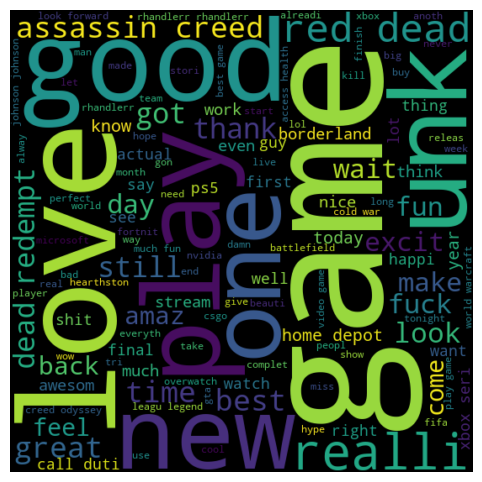

In [44]:
plt.figure(figsize=(12, 6))
plt.imshow(pos_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [45]:
neu_wc=wc.generate(df[df['Sentiments_encoded']==2]['Transformed_text'].str.cat(sep=' '))

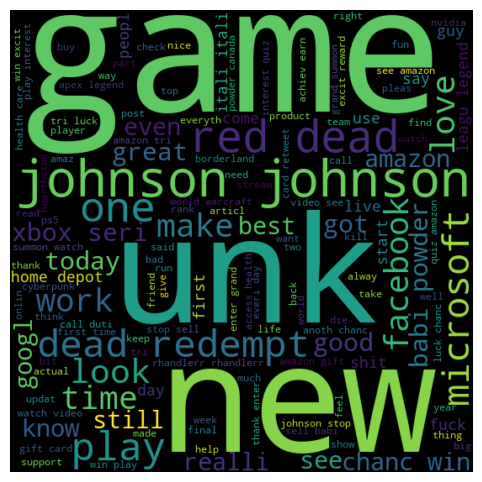

In [46]:
plt.figure(figsize=(12, 6))
plt.imshow(neu_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [47]:
neg_wc=wc.generate(df[df['Sentiments_encoded']==1]['Transformed_text'].str.cat(sep=' '))

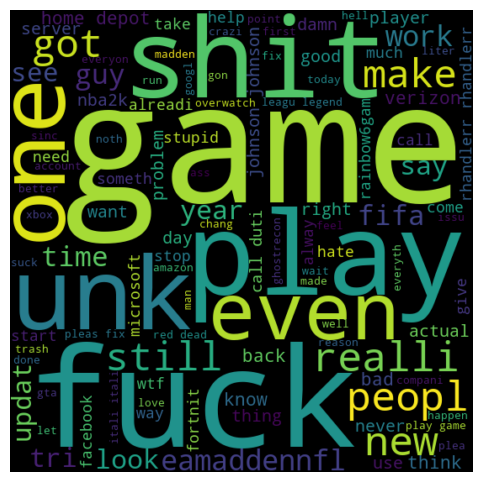

In [48]:
plt.figure(figsize=(12, 6))
plt.imshow(neg_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [49]:
irr_wc=wc.generate(df[df['Sentiments_encoded']==1]['Transformed_text'].str.cat(sep=' '))

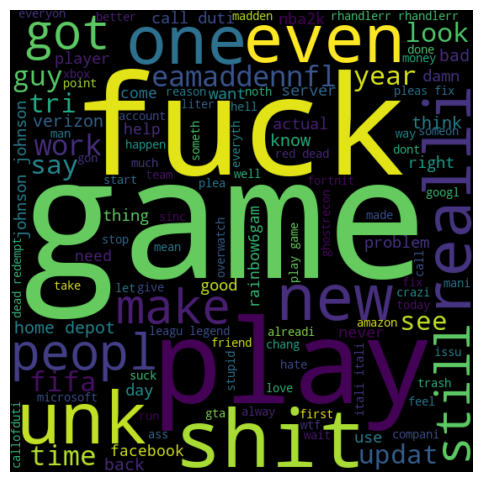

In [50]:
plt.figure(figsize=(12, 6))
plt.imshow(irr_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [55]:
pos_corpus = []
for msg in df[df['Sentiments_encoded']==3]['Transformed_text'].tolist():
        for words in msg.split():
            pos_corpus.append(words)

In [56]:
from collections import Counter
Counter(pos_corpus).most_common(30)

[('game', 3205),
 ('play', 2473),
 ('love', 2024),
 ('good', 1561),
 ('like', 1427),
 ('thank', 1280),
 ('get', 1278),
 ('realli', 1257),
 ('new', 1181),
 ('look', 1157),
 ('time', 1109),
 ('best', 1087),
 ('one', 1076),
 ('great', 968),
 ('fun', 896),
 ('wait', 880),
 ('see', 801),
 ('unk', 776),
 ('year', 736),
 ('excit', 703),
 ('borderland', 702),
 ('red', 697),
 ('day', 694),
 ('fuck', 688),
 ('still', 682),
 ('dead', 676),
 ('much', 670),
 ('amaz', 661),
 ('got', 659),
 ('make', 654)]

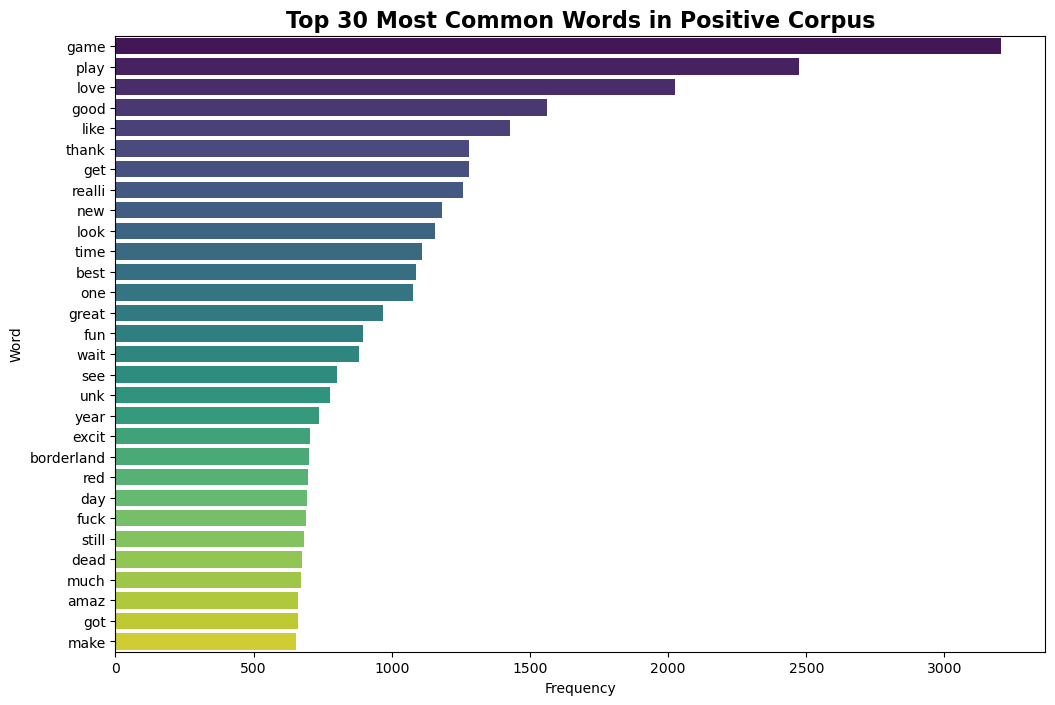

In [67]:
word_frequencies = Counter(pos_corpus).most_common(30)
word_freq_df = pd.DataFrame(word_frequencies, columns=['Word', 'Frequency'])

plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Word', data=word_freq_df, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 30 Most Common Words in Positive Corpus',weight='bold',fontsize=16)
plt.show()

In [58]:
neu_corpus = []
for msg in df[df['Sentiments_encoded']==2]['Transformed_text'].tolist():
        for words in msg.split():
            neu_corpus.append(words)

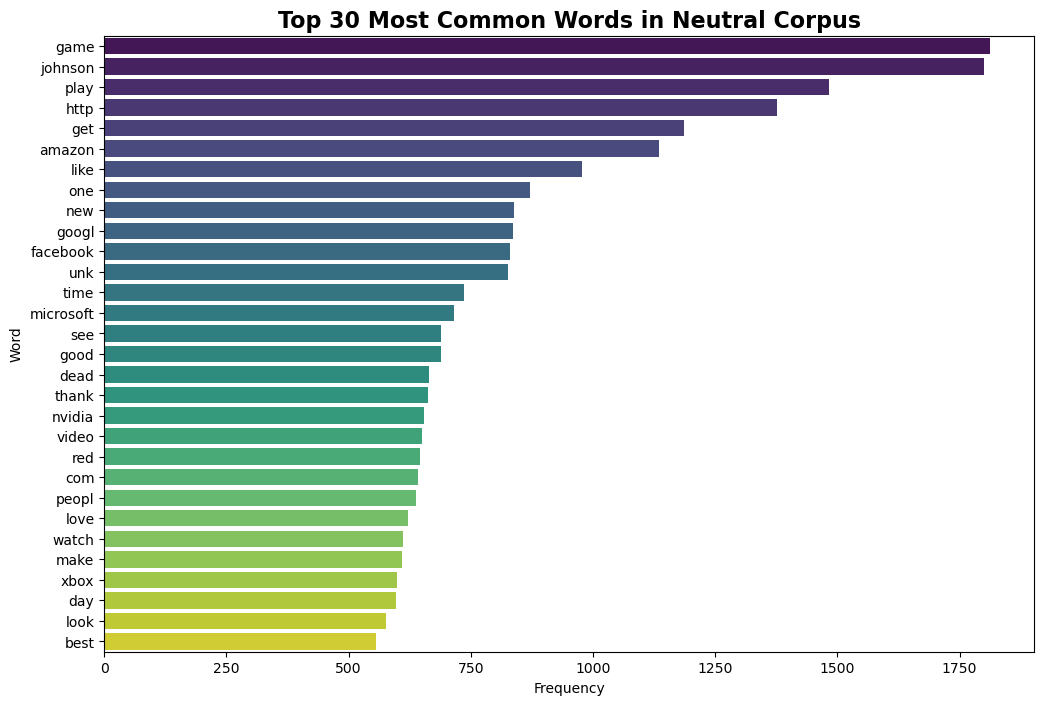

In [66]:
from collections import Counter
Counter(neu_corpus).most_common(30)
word_frequencies = Counter(neu_corpus).most_common(30)
word_freq_df = pd.DataFrame(word_frequencies, columns=['Word', 'Frequency'])

plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Word', data=word_freq_df, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 30 Most Common Words in Neutral Corpus',weight='bold',fontsize=16)
plt.show()


In [60]:
neg_corpus = []
for msg in df[df['Sentiments_encoded']==1]['Transformed_text'].tolist():
        for words in msg.split():
            neg_corpus.append(words)

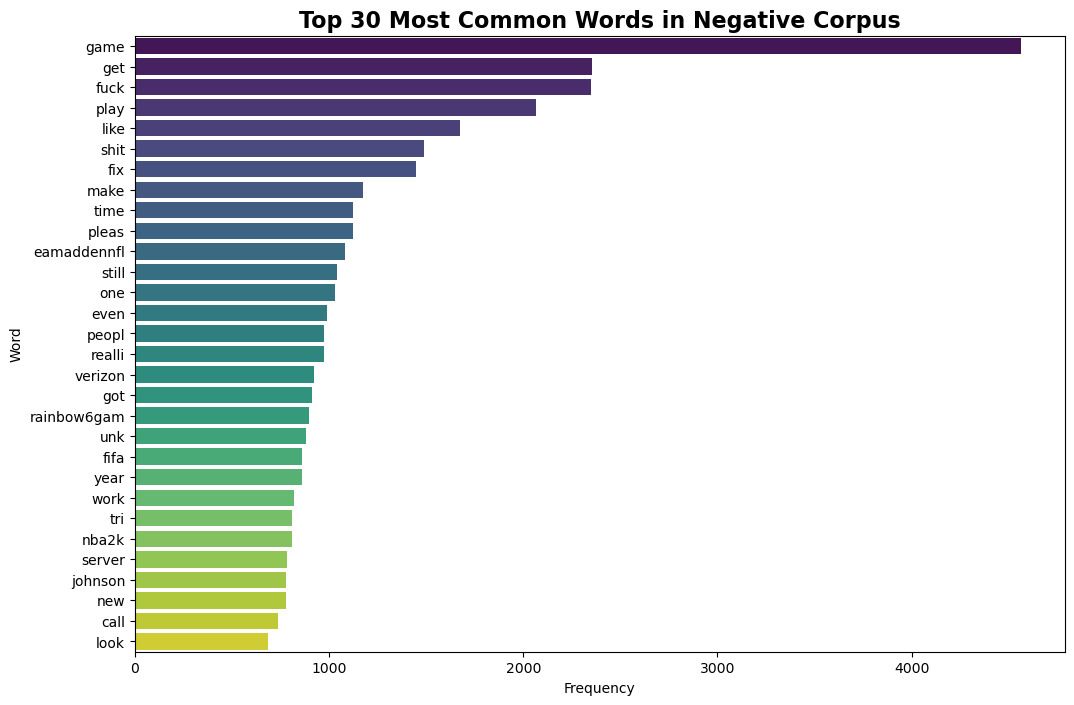

In [65]:
from collections import Counter
Counter(neu_corpus).most_common(30)
word_frequencies = Counter(neg_corpus).most_common(30)
word_freq_df = pd.DataFrame(word_frequencies, columns=['Word', 'Frequency'])

plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Word', data=word_freq_df, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 30 Most Common Words in Negative Corpus',weight='bold',fontsize=16)
plt.show()


In [62]:
irr_corpus = []
for msg in df[df['Sentiments_encoded']==0]['Transformed_text'].tolist():
        for words in msg.split():
            irr_corpus.append(words)

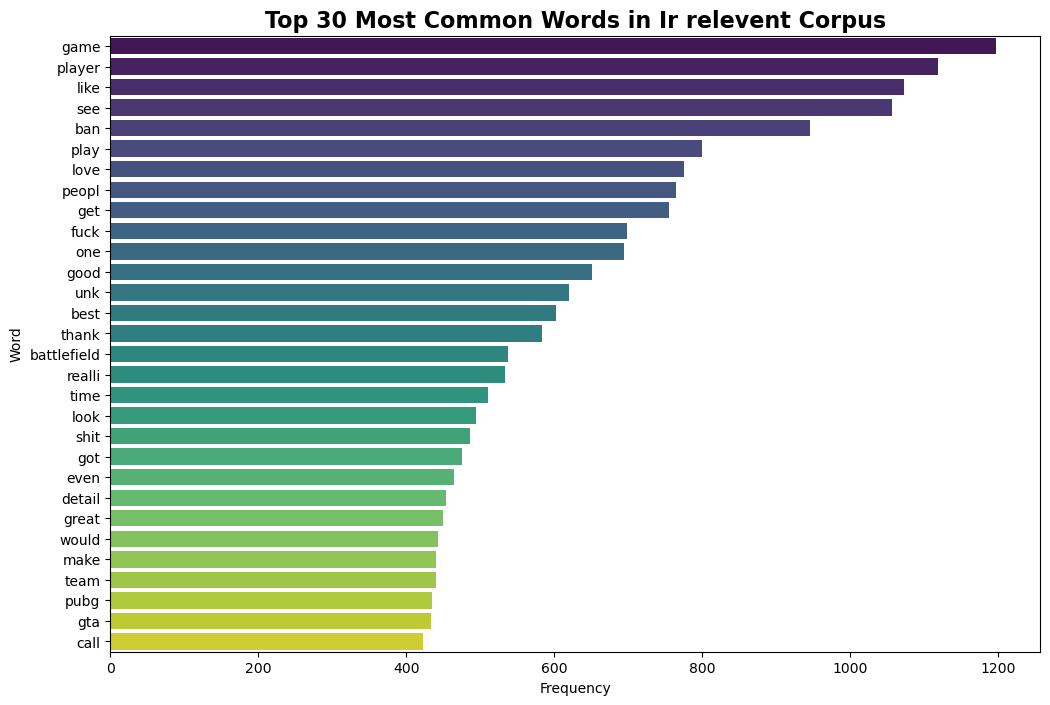

In [64]:
from collections import Counter
Counter(neu_corpus).most_common(30)
word_frequencies = Counter(irr_corpus).most_common(30)
word_freq_df = pd.DataFrame(word_frequencies, columns=['Word', 'Frequency'])

plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Word', data=word_freq_df, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 30 Most Common Words in Ir relevent Corpus',weight='bold',fontsize=16)
plt.show()

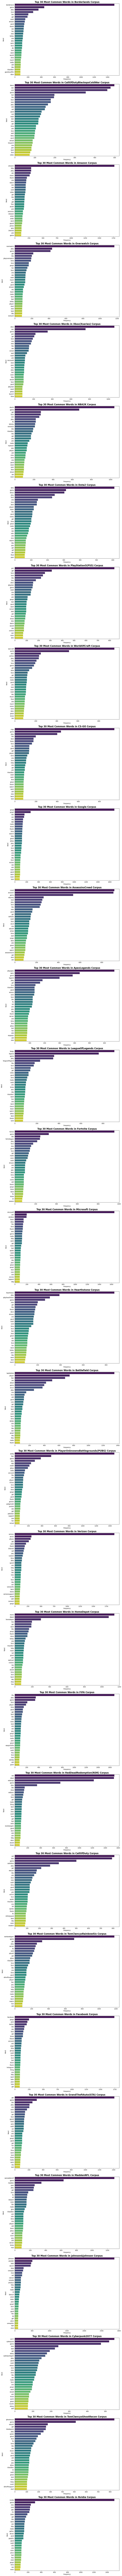

In [68]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'df' with columns 'Game' and 'Transformed_text'
# Replace 'Transformed_text' with the actual column containing the text data

# Define the list of unique games
unique_games = df['Game'].unique()

# Set up subplots
fig, axs = plt.subplots(len(unique_games), figsize=(12, 8 * len(unique_games)), constrained_layout=True)

# Iterate over each game
for i, game in enumerate(unique_games):
    game_corpus = df[df['Game'] == game]['Transformed_text'].str.split().sum()  # Assuming each entry is a list of words
    word_frequencies = Counter(game_corpus).most_common(30)
    word_freq_df = pd.DataFrame(word_frequencies, columns=['Word', 'Frequency'])

    # Create a bar plot for each game
    sns.barplot(ax=axs[i], x='Frequency', y='Word', data=word_freq_df, palette='viridis')
    axs[i].set_xlabel('Frequency')
    axs[i].set_ylabel('Word')
    axs[i].set_title(f'Top 30 Most Common Words in {game} Corpus', weight='bold', fontsize=16)

plt.show()
